/Users/mahdibabayi/phd/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mahdibabayi/phd/venv/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


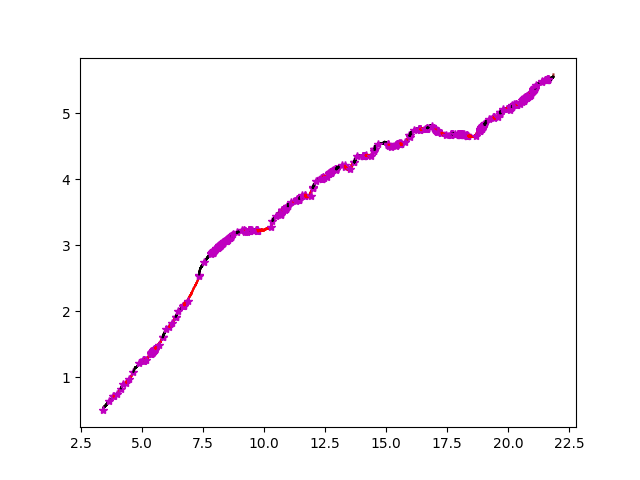

In [1]:
import flexring as flx
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib widget
# with open(data_file) as f:
#     for line in f:
#         point_list.append([float(f) for f in (line.split(","))])
plt.gca().cla()
road_file = Path.joinpath(Path.cwd().parent , "data", "FinsAndThings_2d.asc")
road = flx.Road.make_road_from_file(file_name=road_file, step_size=0.1)
#road.draw()
road.draw()
plt.show()